In [24]:
from elevenlabs import play, stream
from elevenlabs.client import ElevenLabs
from dotenv import load_dotenv
load_dotenv()
import os
import time

client = ElevenLabs(
  api_key=os.getenv("ELEVENLABS_API_KEY_FOUNDEVER"), # Defaults to ELEVEN_API_KEY or ELEVENLABS_API_KEY
)

start_time = time.time()
audio = client.generate(
  text="Hello! Good morning, how are you today? Tell me more about yourself, please",
  voice="Brian",
  model="eleven_turbo_v2_5",
  stream=False
)
ttft = None
total_latency = 0
for chunk in audio:
    #print(len(chunk))
    if not ttft:
        ttft = time.time() - start_time
total_latency = time.time() - start_time

print(f"Time to first chunk: {ttft:.2f}s")
print(f"Total latency: {total_latency:.2f}s")




Time to first chunk: 1.46s
Total latency: 1.47s


In [40]:
latencies_turbo = []
ttfts_turbo = []
for i in range(20):
    start_time = time.time()
    audio = client.generate(
      text="Hello! Good morning, how are you today? Tell me more about yourself, please",
      voice="Brian",
      model="eleven_turbo_v2_5",
      stream=True
    )
    ttft = None
    for chunk in audio:
        if not ttft:
            ttft = time.time() - start_time
    total_latency = time.time() - start_time
    latencies_turbo.append(total_latency)
    ttfts_turbo.append(ttft)  

print(f"Average time to first chunk: {sum(ttfts_turbo)/len(ttfts_turbo):.2f}s")
print(f"Average total latency: {sum(latencies_turbo)/len(latencies_turbo):.2f}s")

Average time to first chunk: 1.31s
Average total latency: 1.37s


In [41]:
latencies_flash = []
ttfts_flash = []
for i in range(20):
    start_time = time.time()
    audio = client.generate(
      text="Hello! Good morning, how are you today? Tell me more about yourself, please",
      voice="Brian",
      model="eleven_flash_v2",
      stream=True
    )
    ttft = None
    for chunk in audio:
        if not ttft:
            ttft = time.time() - start_time
    total_latency = time.time() - start_time
    latencies_flash.append(total_latency)
    ttfts_flash.append(ttft)  

print(f"Average time to first chunk: {sum(ttfts_flash)/len(ttfts_flash):.2f}s")
print(f"Average total latency: {sum(latencies_flash)/len(latencies_flash):.2f}s")

Average time to first chunk: 1.09s
Average total latency: 1.23s


## **For no-streaming:**

**Turbo:**
- Average time to first chunk: 1.37s
- Average total latency: 1.38s

**Flash:**
- Average time to first chunk: 1.24s
- Average total latency: 1.25s

## **For Streaming:**

**Turbo:**
- Average time to first chunk: 1.31s
- Average total latency: 1.37s

**Flash:**
- Average time to first chunk: 1.09s
- Average total latency: 1.23s


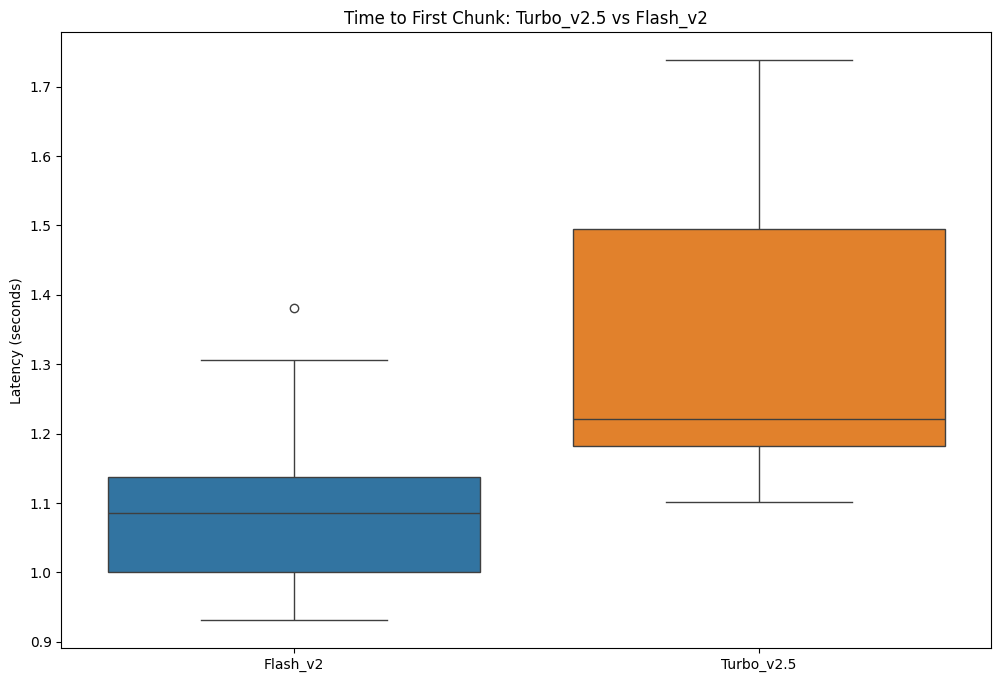

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.boxplot(data=[ttfts_flash, ttfts_turbo])
plt.xticks([0, 1], ["Flash_v2", "Turbo_v2.5"])
plt.title("Time to First Chunk: Turbo_v2.5 vs Flash_v2")
plt.ylabel("Latency (seconds)")
plt.show()

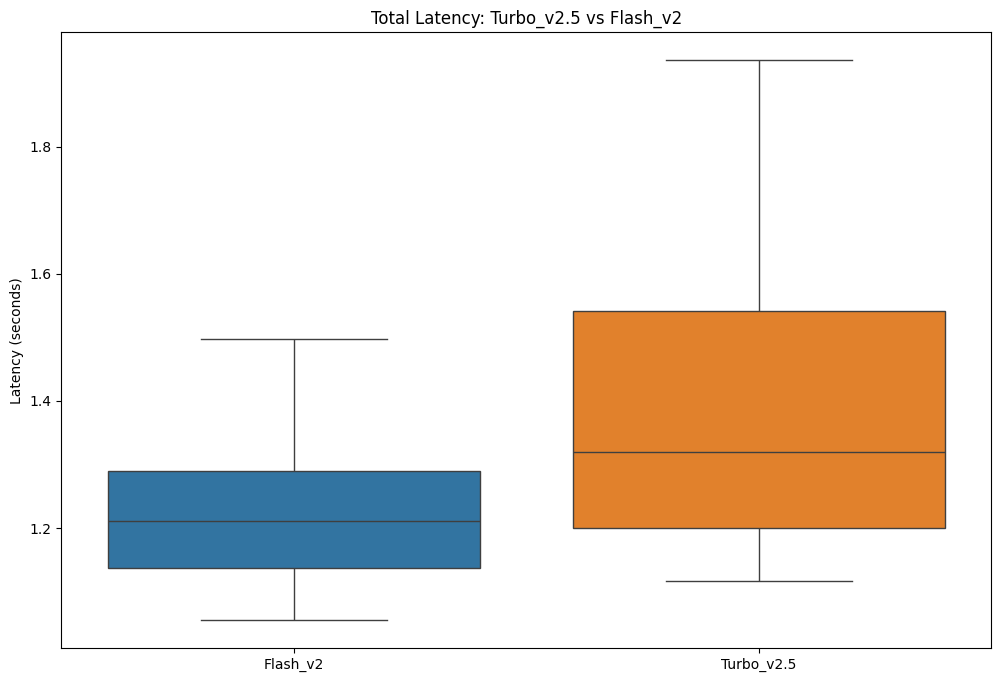

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=[latencies_flash, latencies_turbo])
plt.xticks([0, 1], ["Flash_v2", "Turbo_v2.5"])
plt.title("Total Latency: Turbo_v2.5 vs Flash_v2")
plt.ylabel("Latency (seconds)")
plt.show()

In [5]:
client.models.get_all()

[Model(model_id='eleven_multilingual_v2', name='Eleven Multilingual v2', can_be_finetuned=True, can_do_text_to_speech=True, can_do_voice_conversion=False, can_use_style=True, can_use_speaker_boost=True, serves_pro_voices=False, token_cost_factor=1.0, description='Our most life-like, emotionally rich mode in 29 languages. Best for voice overs, audiobooks, post-production, or any other content creation needs.', requires_alpha_access=False, max_characters_request_free_user=10000, max_characters_request_subscribed_user=10000, maximum_text_length_per_request=10000, languages=[LanguageResponse(language_id='en', name='English'), LanguageResponse(language_id='ja', name='Japanese'), LanguageResponse(language_id='zh', name='Chinese'), LanguageResponse(language_id='de', name='German'), LanguageResponse(language_id='hi', name='Hindi'), LanguageResponse(language_id='fr', name='French'), LanguageResponse(language_id='ko', name='Korean'), LanguageResponse(language_id='pt', name='Portuguese'), Languag